In [ ]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np

x_low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_low = [0.0138772255158169,0.0221039261927566,0.0307559847534142,0.0333802383469528,0.0310469101024708,0.0113509713249679,0.0215322838078248,0.0342579614978095,0.0186836363832804,0.00967378427527804,0.00495182195371593,0.0246842541182654,0.00869799159831521,0.011071053311952,0.00439919906435798,0.00219477191290612,0.00772408319730742]
x_high = [0.000831370100561493,0.0010688646400159,0.00109626819104672,0.00144902673730948,0.00128526632770344,0.000740765792173736,0.00113986070097386,0.00124890088550954,0.00108537216626564,0.000758881997554149,0.000940172148915778,0.00113986070097386,0.000885760635945584,0.00115802821956683,0.00120345724402235,0.000650219665075002,0.000885760635945584]
y_high = [0.049712276733562,0.0616095371769729,0.0804489599215316,0.109658925629902,0.0554748844287114,0.0380787217578242,0.0744112025257465,0.0650140903710383,0.0709464021074233,0.0295939232852759,0.0485071050488615,0.126425147239291,0.0798102127999697,0.173464678504676,0.11952097145133,0.0734640355326383,0.0734640355326383]
m = []


#Run 15 = index 0
#Run 31 = index 16
# len = 17


for i, number in enumerate(x_low):
    slope = (y_high[i]-y_low[i])/(x_high[i]-x_low[i])
    print(slope)
    m.append(slope)

run_count = len(m)

def find_opline_y(index, x_val):
    y_val = m[index]*x_val + y_low[index]
    return float(y_val)

def find_opline_x(index, y_val):
    x_val = (y_val - y_low[index])/m[index]
    return float(x_val)

print(m)
print(x_low)
print(y_low)
print(x_high)
print(y_high)
print(run_count)

print()
print(find_opline_x(0,0.04))
print(find_opline_y(0,0.0006063))


43.10360836111707
36.960349800353235
45.32921375805898
52.641324910665034
19.006157556379293
36.08124283712562
46.39068499575752
24.626557023122437
48.151931059702356
26.249323444487807
46.32692336757076
89.25730401451816
80.28379035577645
140.23287381845384
95.65921262162766
109.60797934573598
74.21864290136457
[43.10360836111707, 36.960349800353235, 45.32921375805898, 52.641324910665034, 19.006157556379293, 36.08124283712562, 46.39068499575752, 24.626557023122437, 48.151931059702356, 26.249323444487807, 46.32692336757076, 89.25730401451816, 80.28379035577645, 140.23287381845384, 95.65921262162766, 109.60797934573598, 74.21864290136457]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0138772255158169, 0.0221039261927566, 0.0307559847534142, 0.0333802383469528, 0.0310469101024708, 0.0113509713249679, 0.0215322838078248, 0.0342579614978095, 0.0186836363832804, 0.00967378427527804, 0.00495182195371593, 0.0246842541182654, 0.00869799159831521, 0.011071053311952, 0.00439919906435798

In [ ]:
def find_eq_y(x): # find y value at x for eq
    result = x**2 * 198.08 + 33.654 * x - 0.0049
    return float(result)

def find_eq_x(x): # move horizontally using y value (find x at y value)
    discriminant = math.sqrt(33.654**2 - 4 * 198.08 * (-0.0049 - x))
    numerator = -33.654 + discriminant
    denominator = 2 * 198.08
    result = numerator / denominator
    return float(result)

# Generate x-values for the equilibrium curve
equilibrium_x = np.linspace(0, 0.01, 100)  # Adjust the range and number of points as needed
equilibrium_y = []

# Calculate corresponding y-values using the equation
for number in equilibrium_x:
    equilibrium_y.append(find_eq_y(number))

test_step = find_eq_x(0.03426)
print(test_step)
print(find_eq_y(test_step))

0.0011557442114849346
0.034260000000000006


In [ ]:
stage_count = []
step_x=[]
step_y=[]
text_marker_x=[]
text_marker_y=[]
text_marker_count=[]

def save_pointer_coords(currentIndex, x_coords, y_coords):
  step_x[currentIndex].append(x_coords)
  step_y[currentIndex].append(y_coords)


def save_marker_coords(currentIndex, x_coords, y_coords, count):
  text_marker_x[currentIndex].append(x_coords)
  text_marker_y[currentIndex].append(y_coords)
  text_marker_count[currentIndex].append(count)

for i, number in enumerate(y_low): #use y value to start moving horizontally and step off
  counter = 0
  x_pointer = x_low[i]
  y_pointer = y_low[i]

  # Initialize as empty lists
  step_x.append([])
  step_y.append([])
  text_marker_x.append([])
  text_marker_y.append([])
  text_marker_count.append([])

  save_pointer_coords(i,x_pointer,y_pointer)

  while x_pointer <= x_high[i]:
    next_x = find_eq_x(y_pointer)

    if next_x > x_high[i]:

      #save_pointer_coords(i, x_high[i], y_pointer) #this line is to save the "mid point" for x direction that goes up to the xy high

      last_y = find_opline_y(i, next_x)
      residual = (y_high[i] - y_pointer)/(last_y - y_pointer)
      x_pointer = next_x
      save_pointer_coords(i,x_pointer,y_pointer)
      save_pointer_coords(i,next_x, last_y)

      counter = counter + residual
      save_marker_coords(i, x_pointer, y_pointer, round(counter,3))
      print(f"Graphical Stage Count for Run #{i+15} = {round(counter,3)} of Equilibrium Stages")
    else:
      x_pointer = next_x
      save_pointer_coords(i,x_pointer,y_pointer)
      counter = counter + 1
      save_marker_coords(i, x_pointer, y_pointer, counter)

      # find op line y and x at this new x from eq
      y_pointer = find_opline_y(i,x_pointer) # Moving vertically
      save_pointer_coords(i,x_pointer,y_pointer)



  stage_count.append(round(counter,3))

print(stage_count)

# Specify the file path
file_path = "output.csv"

# Writing to CSV
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([stage_count])




Graphical Stage Count for Run #15 = 1.391 of Equilibrium Stages
Graphical Stage Count for Run #16 = 1.313 of Equilibrium Stages
Graphical Stage Count for Run #17 = 1.031 of Equilibrium Stages
Graphical Stage Count for Run #18 = 1.185 of Equilibrium Stages
Graphical Stage Count for Run #19 = 1.379 of Equilibrium Stages
Graphical Stage Count for Run #20 = 1.507 of Equilibrium Stages
Graphical Stage Count for Run #21 = 1.337 of Equilibrium Stages
Graphical Stage Count for Run #22 = 1.112 of Equilibrium Stages
Graphical Stage Count for Run #23 = 1.393 of Equilibrium Stages
Graphical Stage Count for Run #24 = 1.977 of Equilibrium Stages
Graphical Stage Count for Run #25 = 2.455 of Equilibrium Stages
Graphical Stage Count for Run #26 = 1.117 of Equilibrium Stages
Graphical Stage Count for Run #27 = 1.507 of Equilibrium Stages
Graphical Stage Count for Run #28 = 1.353 of Equilibrium Stages
Graphical Stage Count for Run #29 = 2.069 of Equilibrium Stages
Graphical Stage Count for Run #30 = 1.64

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


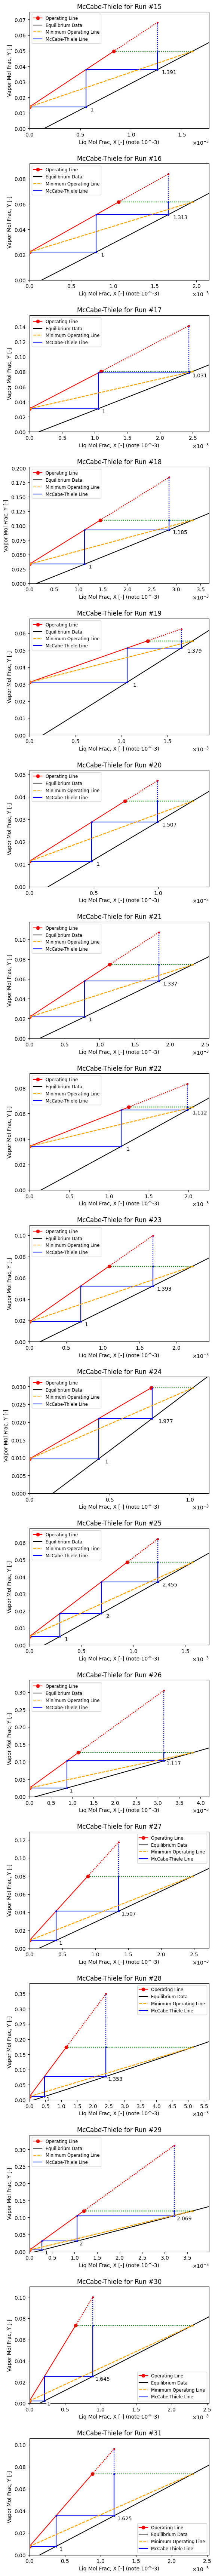

In [ ]:
import matplotlib.ticker as ticker

# Create a 1x17 grid of subplots
fig, axs = plt.subplots(run_count, 1, figsize=(6, run_count * 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)

# Plotting in each subplot
for j in range(run_count):
    i_run = j
    print(i_run)

    # Plot Line Segment (Replace this with your actual data)
    axs[j].plot([x_low[i_run], x_high[i_run]], [y_low[i_run], y_high[i_run]], marker='o', linestyle='-', color='red',
                label='Operating Line')

    # Plot Equilibrium Data (Replace this with your actual data)
    axs[j].plot(equilibrium_x, equilibrium_y, label='Equilibrium Data', color="black")

    # Set x and y boundaries (Replace this with your actual data)
    axs[j].set_xlim(0, find_eq_x(y_high[i_run]) * 1.1)
    axs[j].set_ylim(0, step_y[i_run][-1] * 1.1)

    # Additional Legends (Replace this with your actual data)
    axs[j].plot([0, 0], [0, 0], marker='o', linestyle='--', color='orange', markersize=0, label='Minimum Operating Line')
    axs[j].plot([0, 0], [0, 0], marker='o', linestyle='-', color='blue', markersize=0, label='McCabe-Thiele Line')

    # Adding Labels and Title
    axs[j].set_xlabel('Liq Mol Frac, X [-] (note 10^-3)')
    axs[j].set_ylabel('Vapor Mol Frac, Y [-]')
    axs[j].set_title(f'McCabe-Thiele for Run #{i_run + 15}')

    # Set x-axis ticks to scientific notation
    axs[j].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axs[j].xaxis.get_major_formatter().set_scientific(True)
    axs[j].xaxis.get_major_formatter().set_powerlimits((-2, 2))  # Adjust power limits if needed
    # Set x-axis ticks to scientific notation with a smaller interval
    axs[j].xaxis.set_major_locator(ticker.MultipleLocator(base=0.0005))  # Adjust the base as needed


    # Iterate through each step and plot the connected dots
    for step_index in range(len(step_x[i_run]) - 2):
        axs[j].plot([step_x[i_run][step_index], step_x[i_run][step_index + 1]],
                    [step_y[i_run][step_index], step_y[i_run][step_index + 1]],
                    linestyle='-', color='blue', marker='o', markersize=2)
        axs[j].plot([step_x[i_run][-2], step_x[i_run][-1]],
                    [step_y[i_run][-2], y_high[i_run]],
                    linestyle='-', color='blue', marker='o', markersize=2)
        axs[j].plot([step_x[i_run][-2], step_x[i_run][-1]],
                    [y_high[i_run], step_y[i_run][-1]],
                    linestyle=':', color='blue', marker='o', markersize=2)
        axs[j].plot([x_high[i_run], find_eq_x(y_high[i_run])],
                    [y_high[i_run], y_high[i_run]],
                    linestyle=':', color='green', marker='o', markersize=2)
        axs[j].plot([x_high[i_run], step_x[i_run][-1]],
                    [y_high[i_run], step_y[i_run][-1]],
                    linestyle=':', color='red', marker='o', markersize=2)
        axs[j].plot([x_low[i_run], find_eq_x(y_high[i_run])],
                    [y_low[i_run], y_high[i_run]],
                    linestyle='--', color='orange', marker='o', markersize=2)

        for i, count_val in enumerate(text_marker_count[j]):
          x_pos = text_marker_x[j][i]+(x_high[i_run]-x_low[i_run])*0.05
          y_pos = text_marker_y[j][i]
          axs[j].text(
              x_pos, y_pos, count_val,
              ha='left', va='top', color='black', fontsize=10,
              bbox=dict(facecolor='white', edgecolor=(0, 0, 0, 0), boxstyle='square', pad=0.1),  # Optional: Add a bounding box
          )


    # Add legend
    axs[j].legend(fontsize = 'small')

# Show the plot
plt.show()
